In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Guidelines for data plotting

When asked to produce a plot, you must:

1. Follow directions on whether to use a line plot or scatter plot
2. Provide descriptive labels for all axes and give units when indicated
3. Provide a descriptive title for the plot
4. Provide a descriptive legend for the plot when plotting more than one dataset
5. Use color or marker to differentiate between datasets when plotting more than one dataset

## 1. Linear Regression - Yacht Hydrodynamics

In this example, a linear regressor is constructed to predict the residuary resistance of sailing yachts as a function of hull geometry coefficients and the Froude number.

The Delft data set comprises 308 full-scale experiments performed at the Delft Ship Hydromechanics Laboratory. These experiments include 22 different hull forms, derived from a parent form closely related to the 'Standfast 43' designed by Frans Maas.

Variations concern the longitudinal position of the center of buoyancy, prismatic coefficient, length-displacement ratio, beam-draught ratio, and length-beam ratio. Fourteen different values for the Froude number ranging from 0.125 to 0.450 are considered for every hull form. The measured variable is the residuary resistance per unit weight of displacement.

Attribute Information:

Variations concern hull geometry coefficients and the Froude number:

1. Longitudinal position of the center of buoyancy, adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam-draught ratio, adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional.

The measured variable is the residuary resistance per unit weight of displacement:

7. Residuary resistance per unit weight of displacement, adimensional.


Relevant Papers:

J. Gerritsma, R. Onnink, and A. Versluis. Geometry, resistance and stability of the delft systematic yacht hull series. In International Shipbuilding
Progress, volume 28, pages 276â€“297, 1981.

I. Ortigosa, R. Lopez and J. Garcia. A neural networks approach to residuary resistance of sailing
yachts prediction. In Proceedings of the International Conference on Marine Engineering MARINE
2007, 2007.

### Step 0: Load the dataset

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data

--2023-02-21 21:53:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11487 (11K) [application/x-httpd-php]
Saving to: ‘yacht_hydrodynamics.data’

yacht_hydrodynamics 100%[===================>]  11.22K  --.-KB/s    in 0s      

2023-02-21 21:53:10 (72.4 MB/s) - ‘yacht_hydrodynamics.data’ saved [11487/11487]



In [ ]:
names = ['Longitudinal position of the center of buoyancy',
         'Prismatic coefficient',
         'Length-displacement ratio',
         'Beam-draught ratio',
         'Length-beam ratio',
         'Froude number',
         'Residuary resistance per unit weight of displacement']
df = pd.read_csv('yacht_hydrodynamics.data', sep=' ', names=names).dropna()
df

,Longitudinal position of the center of buoyancy,Prismatic coefficient,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,Froude number,Residuary resistance per unit weight of displacement
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
...,...,...,...,...,...,...,...
303,-2.3,0.600,4.34,4.23,2.73,0.350,8.47
304,-2.3,0.600,4.34,4.23,2.73,0.375,12.27
305,-2.3,0.600,4.34,4.23,2.73,0.400,19.59
306,-2.3,0.600,4.34,4.23,2.73,0.425,30.48


### Step 1: Visualize the dataset

**Construct a correlation heatmap plot** using the code provided below. The heatmap shows the Pearson correlation coefficient between each pair of variables in the dataset.

```python
corr = df.corr()
corr
```

```python
sns.heatmap(df.corr())
```

**Answer the following questions**:

1. What feature variable(s) have the highest correlation with the task variable ('Residuary resistance per unit weight of displacement')?
2. What feature variable(s) have the lowest correlation with the task variable?
3. Are there any feature variables that are correlated to one-another i.e. r>0.5?

Next, **construct a histogram of the task variable**. Comment on the distribution of values based on visual inspection of the histogram.

In [ ]:
corr = df.corr()
corr
#1 Residuary resistance per unit weight of displacement
#2 Longitudinal position of the center of buoyancy
#3 (Residuary resistance per unit weight of displacement and Froude number correlate) and (Length-beam ratio and Beam-draught ratio correlate)0

,Longitudinal position of the center of buoyancy,Prismatic coefficient,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,Froude number,Residuary resistance per unit weight of displacement
Longitudinal position of the center of buoyancy,1.000000e+00,-3.627613e-02,-1.523423e-01,-3.731116e-02,-7.824646e-02,1.066029e-16,-0.002407
Prismatic coefficient,-3.627613e-02,1.000000e+00,-5.659992e-02,3.146921e-01,-1.025282e-01,4.399300e-16,-0.029459
Length-displacement ratio,-1.523423e-01,-5.659992e-02,1.000000e+00,3.946441e-01,6.533054e-01,8.734784e-17,-0.004748
Beam-draught ratio,-3.731116e-02,3.146921e-01,3.946441e-01,1.000000e+00,-3.969578e-01,-1.163139e-16,-0.013568
Length-beam ratio,-7.824646e-02,-1.025282e-01,6.533054e-01,-3.969578e-01,1.000000e+00,7.684498e-17,0.000065
Froude number,1.066029e-16,4.399300e-16,8.734784e-17,-1.163139e-16,7.684498e-17,1.000000e+00,0.807955
Residuary resistance per unit weight of displacement,-2.407050e-03,-2.945918e-02,-4.747883e-03,-1.356769e-02,6.520978e-05,8.079548e-01,1.000000


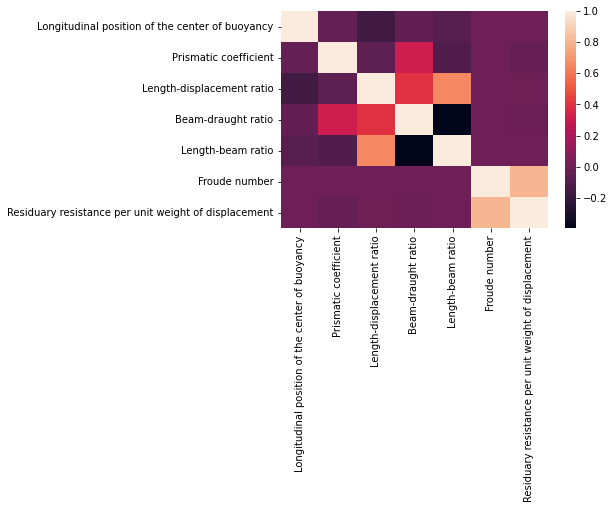

In [ ]:
sns.heatmap(df.corr())

Text(0, 0.5, 'Frequency')

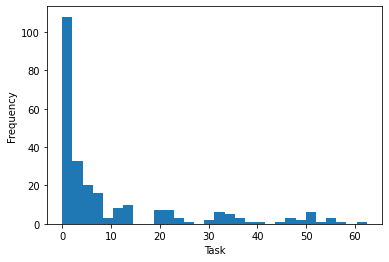

In [ ]:
plt.hist(y,bins=30)
plt.xlabel('Task')
plt.ylabel('Frequency')


### Step 2: Prepare the dataset for modeling

**Split the dataset into features (`X`) and task/labels (`y`). Split the features/labels into training and testing sets.**

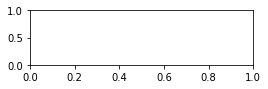

In [ ]:
x = df[['Longitudinal position of the center of buoyancy','Prismatic coefficient','Length-displacement ratio','Beam-draught ratio','Length-beam ratio','Froude number','Residuary resistance per unit weight of displacement']].values
y = df['Residuary resistance per unit weight of displacement']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1234)

### Step 3: Log transformation of labels

Performing a log-transformation of the label variable before modeling can be useful when the prediction task (1) is strictly greater than zero and (2) varies over several orders of magnitude.

**Perform a natural log transformation of the training and testing set prediction task**
```python
y_train = np.log(y_train)
y_test = np.log(y_test)
```

Next, **construct a histogram of the transformed task variable**. Comment on the distribution of values based on visual inspection of the histogram.

In [ ]:
y_train = np.log(y_train)
y_test = np.log(y_test)

Text(0, 0.5, 'Frequency')

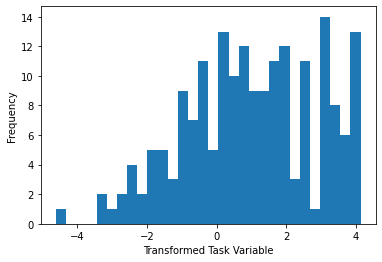

In [ ]:
plt.hist(y_train,bins=30)
plt.xlabel('Transformed Task Variable')
plt.ylabel('Frequency')

### Step 4: Model training and scoring

**Train a `LinearRegression` model using the training set. Evaluate the model on the test set using the `mean_squared_error` and `r2_score` metrics.** Note: Be sure to *reverse* the log transformation applied in step 3 before computing the metrics.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)
squared_error = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(squared_error)
print(r2)


6.206492131665429
0.9713604792421806


### Step 5: Visualize the results

**Construct a parity plot comparing the ground truth labels with the model predictions on the test set.** The parity plot should contain (1) a scatter plot showing the ground truth (x-axis) and predictions (y-axis) and (2) a parity line (or, a line where x=y). Be sure to follow all plotting guidelines.

Text(0, 0.5, 'predicted labels')

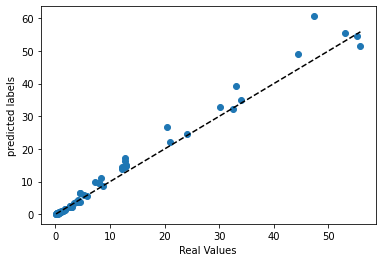

In [ ]:
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'k--')
plt.xlabel('Real Values')
plt.ylabel('predicted labels')

## 2. K-Nearest Neighbors Classification - Steel Plate Fault Analysis

The goal of this learning task is to correctly classify the type of surface defects in stainless steel plates, with seven types of possible defects. The features are a set of 27 indicators that approximately describe the geometric shape of the defect and its outline.

Data Set Information:

Type of dependent variables (7 Types of Steel Plates Faults):
1. Pastry
2. Z_Scratch
3. K_Scratch
4. Stains
5. Dirtiness
6. Bumps
7. Other_Faults

A value of "1" indicates the presence of a particular fault class in a sample and a value of "0" indicates the absense of that particular fault class.

Attribute Information:

27 independent variables:
1. X_Minimum
2. X_Maximum
3. Y_Minimum
4. Y_Maximum
5. Pixels_Areas
6. X_Perimeter
7. Y_Perimeter
8. Sum_of_Luminosity
9. Minimum_of_Luminosity
10. Maximum_of_Luminosity
11. Length_of_Conveyer
12. TypeOfSteel_A300
13. TypeOfSteel_A400
14. Steel_Plate_Thickness
15. Edges_Index
16. Empty_Index
17. Square_Index
18. Outside_X_Index
19. Edges_X_Index
20. Edges_Y_Index
21. Outside_Global_Index
22. LogOfAreas
23. Log_X_Index
24. Log_Y_Index
25. Orientation_Index
26. Luminosity_Index
27. SigmoidOfAreas

Relevant Papers:

1.M Buscema, S Terzi, W Tastle, A New Meta-Classifier,in NAFIPS 2010, Toronto (CANADA),26-28 July 2010, 978-1-4244-7858-6/10 Â©2010 IEEE

2.M Buscema, MetaNet: The Theory of Independent Judges, in Substance Use & Misuse, 33(2), 439-461,1998


### Step 0: Load the dataset

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults27x7_var
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults.NNA

--2023-02-22 00:41:44--  http://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults27x7_var
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 497 [application/x-httpd-php]
Saving to: ‘Faults27x7_var’

Faults27x7_var      100%[===================>]     497  --.-KB/s    in 0s      

2023-02-22 00:41:44 (41.2 MB/s) - ‘Faults27x7_var’ saved [497/497]

--2023-02-22 00:41:44--  http://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults.NNA
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299482 (292K) [application/x-httpd-php]
Saving to: ‘Faults.NNA’

Faults.NNA          100%[===================>] 292.46K  1.07MB/s    in 0.3s    

2023-02-22 00:41

In [ ]:
names = pd.read_csv('Faults27x7_var', header=None).T.iloc[0]
df = pd.read_csv('Faults.NNA', sep='\t', names=names)
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


### Step 1: Visualize the dataset

**Produce a `sns.pairplot`** showing the distribution of values of `Steel_Plate_Thickness`, `TypeOfSteel_A300`, `TypeOfSteel_A400`. Use the task label `Bumps` to color the points.

**Answer the following questions:**
1. **What type of steel is more likely to have bump faults**: A300 or A400?
2. **What thickness of steel is more likely to have bump faults**: less than 100 or greater than 100?

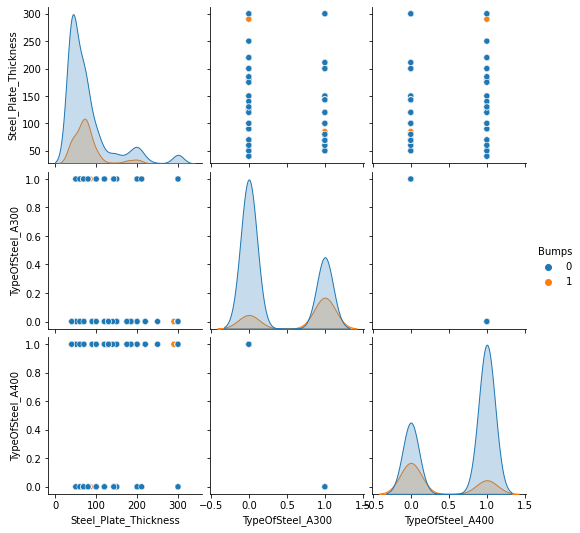

In [ ]:
thickness = df['Steel_Plate_Thickness']
A300 = df['TypeOfSteel_A300']
A400 = df['TypeOfSteel_A400']
bumps = df['Bumps']
all3 = pd.concat([thickness,A300,A400,bumps],axis = 1)
sns.pairplot(data=all3,hue='Bumps')

1) A400 is more likely to have bumps faults
2)less than 100 is more likely to have bump faults

### Step 2: Prepare the dataset for modeling

For this homework problem, **we will focus on the `Bumps` prediction task.** **Split the dataset into features (`X`) and task/labels (`y`). Split the features/labels into training and testing sets.** Be sure to include only the `Bumps` task in the labels array, and be sure to exclude all task/label data from the features.

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
x = df[['X_Minimum','X_Maximum','Y_Minimum','Y_Maximum','Pixels_Areas','X_Perimeter','Y_Perimeter','Sum_of_Luminosity','Minimum_of_Luminosity','Maximum_of_Luminosity','Length_of_Conveyer','TypeOfSteel_A300','TypeOfSteel_A400','Steel_Plate_Thickness','Edges_Index','Empty_Index','Square_Index','Outside_X_Index','Edges_X_Index','Edges_Y_Index','Outside_Global_Index','LogOfAreas','Log_X_Index','Log_Y_Index','Orientation_Index','Luminosity_Index','SigmoidOfAreas']].values
y = df['Bumps'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1234)

### Step 3: Standardization transformation of features

Because the feature values vary by several orders of magnitude across different features, we expect that applying a standardization transformation to the features will improve the quality of our distance metric used to make predictions in the `KNeighborsClassifier`.

**Apply a standardization transformation to the features using the `sklearn.preprocessing.StandardScaler()` class.** Be sure to fit the transformation with the training data, and apply the transformation to both the training and testing data after transformation fitting.

In [ ]:
from sklearn.preprocessing import StandardScaler
x_transform = StandardScaler().fit(x_train)
x_train = x_transform.transform(x_train)
x_test = x_transform.transform(x_test)

### Step 4: Hyperparameter optimization

We are interested in a `KNeighborsClassifier` model for predicting the presence of bump faults in steel plates. **Perform hyperparameter optimization to determine the optimal value of `n_neighbors`.** Use the `sklearn.model_selection.GridSearchCV` class to perform 5-fold cross-validation with the `KNeighborsClassifier` model across a range of possible values for `n_neighbors`. You may select the range of possible `n_neighbors` values, but you must compare at least 10 separate values. **Print out the best value of `n_neighbors` as determined by your search, as well as the associate accuracy score.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

knn = KNeighborsClassifier()

grid_search  = GridSearchCV(knn, parameters,cv=5)
grid_search.fit(x_train,y_train)

print(grid_search.best_params_['n_neighbors'])
print(grid_search.best_score_)

4
0.8432989690721648


### Step 5: Visualize results

First, **construct a complexity curve showing the mean cross-validation score as a function of the `n_neighbors` hyperparameter**. As we do in class, be sure to plot (1) a scatter plot of `n_neighbors` (x-axis) and the mean validation score, (2) a line plot of `n_neighbors` and the mean validation score, and (3) error bars based on the mean and stdev of the mean validation score. Be sure to follow all plotting guidelines.

Next, **construct a confusion matrix plot** comparing the ground truth labels and the model predictions on the test set.

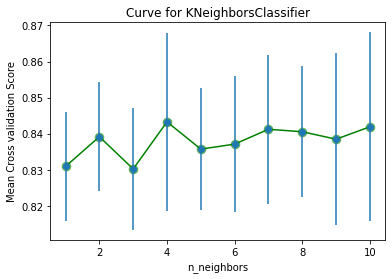

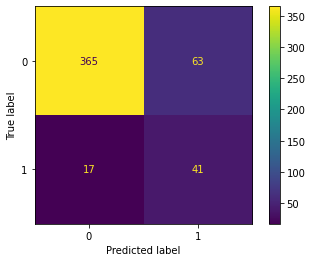

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
grid_search = GridSearchCV(knn,parameters,cv=5)
grid_search.fit(x_train,y_train)
results = grid_search.cv_results_
means = results['mean_test_score']
scores = results['std_test_score']


plt.scatter(parameters['n_neighbors'],means,c='green',s=75,alpha=.5)
plt.plot(parameters['n_neighbors'],means,c='green',label = 'Train Score')
plt.errorbar(parameters['n_neighbors'],means,yerr = scores,fmt='o')

plt.xlabel('n_neighbors')
plt.ylabel('Mean Cross validation Score')
plt.title('Curve for KNeighborsClassifier')
y_pred = grid_search.predict(x_test)
cm = confusion_matrix(y_pred,y_test)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()